In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
def plot_data(X, y, W=None, b=None, ax=None):
    plot_target = plt
    if ax is not None:
        ax.clear()
        plot_target = ax

    plot_target.plot(X_train, y_train, 'ro', label='Original data')
    if W is not None and b is not None:
        plot_target.plot(X_train, W * X_train + b, label='Fitted line')
    plot_target.legend()

    if ax is None:
        plt.show()

In [3]:
# Parameters
LEARNING_RATE = 1e-2
NUM_TRAINING_EPOCHS = int(1e3)
DISPLAY_EVERY = 50

In [4]:
# Training Data
X_train = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                      7.042,10.791,5.313,7.997,5.654,9.27,3.1])
y_train = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                      2.827,3.465,1.65,2.904,2.42,2.94,1.3])
N_train = X_train.shape[0]

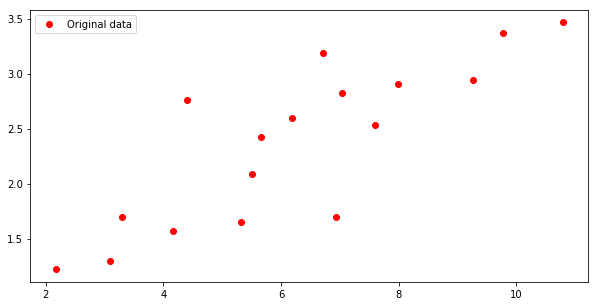

In [5]:
plot_data(X_train, y_train)

In [6]:
# tf Graph Input
X_ph = tf.placeholder("float")
y_ph = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [7]:
# Construct a linear model
y_pred = tf.add(tf.multiply(X_ph, W), b)

In [8]:
# Mean squared error
loss = tf.reduce_sum(tf.pow(y_pred-y_ph, 2))/(2*N_train)

# Gradient descent
minimize = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [9]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

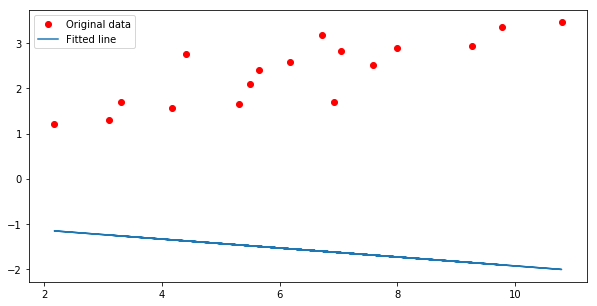

In [10]:
with tf.Session() as sess:
    sess.run(init)
    W_num, b_num = sess.run((W, b))

plot_data(X_train, y_train, W_num, b_num)

<IPython.core.display.Javascript object>


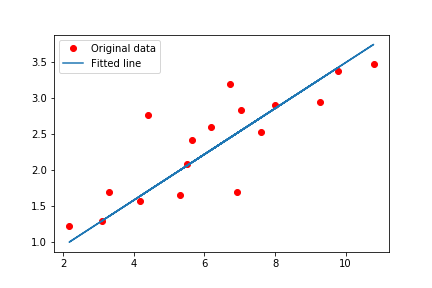

Epoch: 0050; Loss: 0.2275853902; W: 0.4665442705; b: -0.7592611313
Epoch: 0100; Loss: 0.2101869732; W: 0.4536413550; b: -0.6664382219
Epoch: 0150; Loss: 0.1947973520; W: 0.4415055215; b: -0.5791342258
Epoch: 0200; Loss: 0.1811850816; W: 0.4300916195; b: -0.4970237017
Epoch: 0250; Loss: 0.1691446602; W: 0.4193565547; b: -0.4197962582
Epoch: 0300; Loss: 0.1584948152; W: 0.4092599452; b: -0.3471618593
Epoch: 0350; Loss: 0.1490749121; W: 0.3997637928; b: -0.2788473368
Epoch: 0400; Loss: 0.1407429576; W: 0.3908325434; b: -0.2145959735
Epoch: 0450; Loss: 0.1333734095; W: 0.3824323118; b: -0.1541659683
Epoch: 0500; Loss: 0.1268550903; W: 0.3745317757; b: -0.0973301157
Epoch: 0550; Loss: 0.1210897118; W: 0.3671011329; b: -0.0438743718
Epoch: 0600; Loss: 0.1159903333; W: 0.3601124883; b: 0.0064020720
Epoch: 0650; Loss: 0.1114800796; W: 0.3535393178; b: 0.0536883287
Epoch: 0700; Loss: 0.1074909121; W: 0.3473571539; b: 0.0981622785
Epoch: 0750; Loss: 0.1039626449; W: 0.3415427804; b: 0.1399910003

<IPython.core.display.Javascript object>


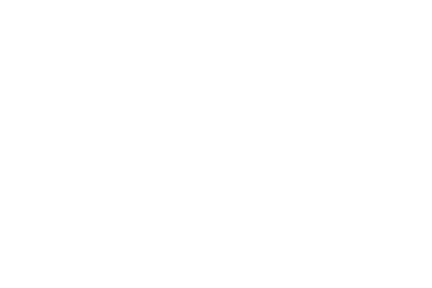

In [13]:
%matplotlib notebook

# Start training
with tf.Session() as sess:
    sess.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    fig.show()
    fig.canvas.draw()

    plot_data(X_train, y_train, W_num, b_num, ax=ax)

    # Fit all training data
    for epoch in range(1, NUM_TRAINING_EPOCHS+1):
        for (X, y) in zip(X_train, y_train):
            sess.run(minimize, feed_dict={ X_ph: X, y_ph: y })

        #Display logs per epoch step
        if epoch % DISPLAY_EVERY == 0:
            feed_dict = { X_ph: X_train, y_ph: y_train }
            W_num, b_num, loss_num = sess.run((W, b, loss), feed_dict)

            plot_data(X_train, y_train, W_num, b_num, ax=ax)
            fig.canvas.draw()
            
            print("Epoch: {:04d}; Loss: {:.10f}; W: {:.10f}; b: {:.10f}"
                  "".format(epoch, loss_num, W_num, b_num))

            time.sleep(0.5)

    print("Optimization Finished!")
    loss_num , W_num, b_num = sess.run((loss, W, b), feed_dict={X_ph: X_train, y_ph: y_train})
    print("Training loss: {:.10f}; W: {:.10f}; b: {:.10f}"
          "".format(loss_num, W_num, b_num))